In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ber = np.array([0, 2, 4, 12, 11, 3])
dre = np.array([2, 0, 6, 10, 7, 5])
ham = np.array([4, 6, 0, 8, 15, 1])
kob = np.array([12, 10, 8, 0, 9, 13])
mue = np.array([11, 7, 15, 9, 0, 14])
ros = np.array([3, 5, 1, 13, 14, 0])

In [3]:
dist = np.column_stack([ber, dre, ham, kob, mue, ros])
a = (dist ** 2) * (-0.5)
u = np.ones((6, 1))
i = np.eye(6)
h = i - (1 / 6) * (u @ u.T)
b = h @ a @ h

vals, vecs = np.linalg.eigh(b)
idx = np.argsort(vals)[::-1]
vals = vals[idx]
V = vecs[:, idx]
g1 = V[:, :2]
g2 = np.diag(vals[:2])
x = g1 @ np.sqrt(g2)

d12 = np.linalg.norm(x[0] - x[1])
d13 = np.linalg.norm(x[0] - x[2])
d14 = np.linalg.norm(x[0] - x[3])
d15 = np.linalg.norm(x[0] - x[4])
d16 = np.linalg.norm(x[0] - x[5])
d23 = np.linalg.norm(x[1] - x[2])
d24 = np.linalg.norm(x[1] - x[3])
d25 = np.linalg.norm(x[1] - x[4])
d26 = np.linalg.norm(x[1] - x[5])
d34 = np.linalg.norm(x[2] - x[3])
d35 = np.linalg.norm(x[2] - x[4])
d36 = np.linalg.norm(x[2] - x[5])
d45 = np.linalg.norm(x[3] - x[4])
d46 = np.linalg.norm(x[3] - x[5])
d56 = np.linalg.norm(x[4] - x[5])

d14 = (d14 + d15) / 2
d15 = d14
d16 = (d14 + d15 + d16 + d23 + d24 + d25 + d26) / 7
d14 = d16
d15 = d16
d23 = d16
d24 = d16
d25 = d16
d26 = d16
d35 = (d35 + d36) / 2
d36 = d35

dd = np.array([
    [0,   d12, d13, d14, d15, d16],
    [d12, 0,   d23, d24, d25, d26],
    [d13, d23, 0,   d34, d35, d36],
    [d14, d24, d34, 0,   d45, d46],
    [d15, d25, d35, d45, 0,   d56],
    [d16, d26, d36, d46, d56, 0  ]
])

f_x = np.arange(1, 16)
f_y = np.array([d12, d13, d14, d15, d16, d23, d24, d25, d26, d34, d35, d36, d45, d46, d56])
x1 = f_x
x2 = f_y
l = np.column_stack([np.array([15, 1]), np.array([14.4, 3.17])])
x3 = l[:, 0]
x4 = l[:, 1]

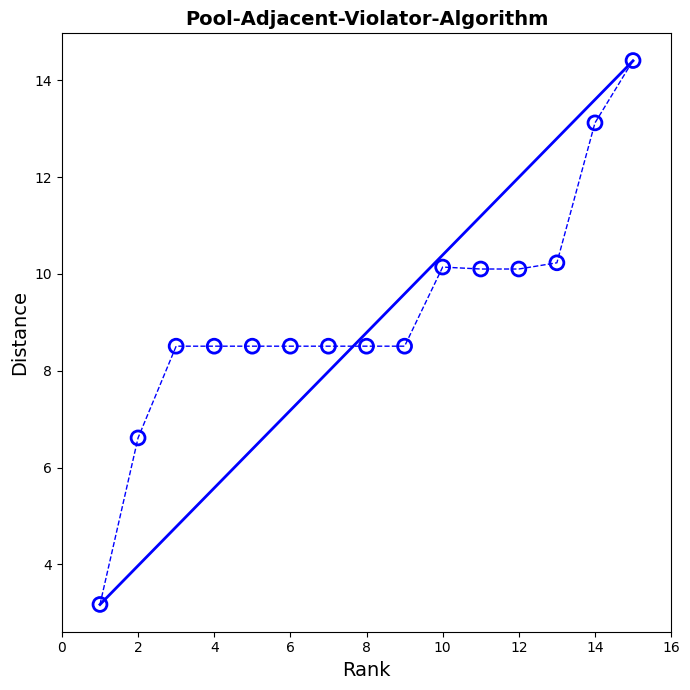

In [5]:
plt.figure(figsize=(7, 7))
plt.scatter(x1, x2, color='none', edgecolor='b', s=100, linewidth=2)
plt.plot(x1, x2, linestyle='--', linewidth=1, color='b')
plt.plot(x3, x4, linewidth=2, color='b')
plt.xlim(0, 16)
plt.xlabel('Rank', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.title('Pool-Adjacent-Violator-Algorithm', fontweight='heavy', fontsize=14)
plt.tight_layout()
plt.savefig("MVAMDSpooladj.png", transparent=True, dpi=144)
plt.show()